In [1]:
import math
from itertools import cycle, islice, product
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge

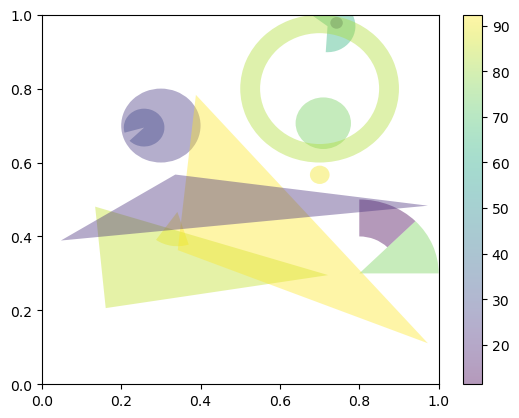

In [2]:
# fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # full ring
    Wedge((.8, .3), .2, 0, 45),              # full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), closed=True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

In [6]:
import itertools
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import numpy as np

In [7]:
class PolygonGenerator:
    def __init__(self, start_x=0, start_y=0, step=1):
        self.start_x = start_x
        self.start_y = start_y
        self.step = step  # шаг сдвига для генерации непересекающихся полигонов

    def gen_rectangle(self, width=1, height=1):
        # генерирует бесконечную последовательность прямоугольников
        x, y = self.start_x, self.start_y
        while True:
            yield ((x, y), (x + width, y), (x + width, y + height), (x, y + height))
            x += width + self.step

    def gen_triangle(self, size=1):
        # генерирует бесконечную последовательность равносторонних треугольников
        x, y = self.start_x, self.start_y
        height = size * (3 ** 0.5 / 2)
        while True:
            yield ((x, y), (x + size, y), (x + size / 2, y + height))
            x += size + self.step

    def gen_hexagon(self, size=1):
        # генерирует бесконечную последовательность правильных шестиугольников
        x, y = self.start_x, self.start_y
        while True:
            yield ((x + size * math.cos(math.radians(60 * i)), y + size * math.sin(math.radians(60 * i))) for i in range(6))
            x += 2 * size + self.step
            
    def tr_translate(self, polygons, dx, dy):
        # переносит все полигоны в итераторе на указанные смещения dx, dy
        for polygon in polygons:
            yield [(x + dx, y + dy) for x, y in polygon]
            
    def tr_rotate(self, polygons, angle=0, center_x=0, center_y=0):
        # поворачивает все полигоны в итераторе на заданный угол вокруг указанной точки
        rad = math.radians(angle)  # перевод угла в радианы
        cos_theta = math.cos(rad)
        sin_theta = math.sin(rad)
        
        for polygon in polygons:
            rotated_polygon = [(center_x + (x - center_x) * cos_theta - (y - center_y) * sin_theta,
                 center_y + (x - center_x) * sin_theta + (y - center_y) * cos_theta) for x, y in polygon]
            yield rotated_polygon
    
    def tr_symmetry(self, polygons, OX=False, OY=False, offset=0):
        if OX:
            for polygon in polygons:
                yield [(x, -y + offset) for x, y in polygon]
        if OY:
            for polygon in polygons:
                yield [(-x + offset, y) for x, y in polygon]
    
    def tr_homothety(self, polygons, center_x, center_y, scale):
        # применяет гомотетию к каждому полигону в итераторе
        for polygon in polygons:
                transformed_polygon = [(center_x + (x - center_x) * scale, center_y + (y - center_y) * scale) for x, y in polygon]
                yield transformed_polygon

def plot_polygons(polygon_iterators, n=5, colors=None):
    # визуализирует первые n полигонов из нескольких итераторов на одном графическом поле
    fig, ax = plt.subplots()
    if not isinstance(polygon_iterators, list):
        polygon_iterators = list(polygon_iterators)
    if colors is None:
        colors = plt.cm.viridis(np.linspace(0, 1, len(polygon_iterators)))

    # перебираем каждый итератор и его соответствующий цвет
    for polygons, color in zip(polygon_iterators, colors):
        for polygon in itertools.islice(polygons, n):
            poly_patch = patches.Polygon(polygon, closed=True, edgecolor='black', facecolor=color, alpha=0.5)
            ax.add_patch(poly_patch)

    # настройка отображения графика
    ax.axhline(0, color='black', linewidth=2)  # горизонтальная ось Y
    ax.axvline(0, color='black', linewidth=2)  # вертикальная ось X
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

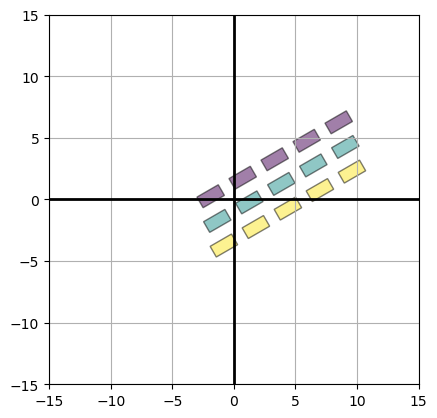

In [8]:
generator = PolygonGenerator()
rect1 = generator.gen_rectangle(width=2, height=1)
rect2 = generator.gen_rectangle(width=2, height=1)
rect3 = generator.gen_rectangle(width=2, height=1)

rotate_figure1 = generator.tr_rotate(rect1, angle=30, center_x=0, center_y=-5)
rotate_figure2 = generator.tr_rotate(rect2, angle=30, center_x=4, center_y=-5)
rotate_figure3 = generator.tr_rotate(rect3, angle=30, center_x=8, center_y=-5)

plot_polygons([rotate_figure1, rotate_figure2, rotate_figure3])

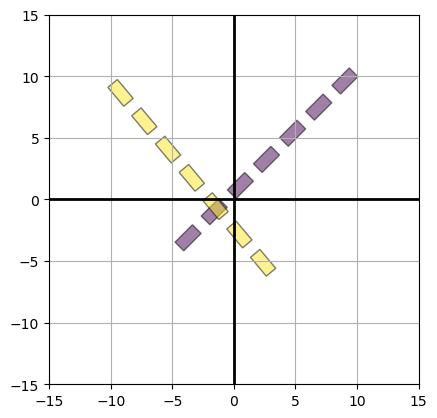

In [9]:
generator = PolygonGenerator()
rect1 = generator.gen_rectangle(width=2, height=1)
rect2 = generator.gen_rectangle(width=2, height=1)

rotate_figure1 = generator.tr_rotate(rect1, angle=45, center_x=3, center_y=-7)
rotate_figure2 = generator.tr_rotate(rect2, angle=130, center_x=3, center_y=-2)

plot_polygons([rotate_figure1, rotate_figure2], n=7)

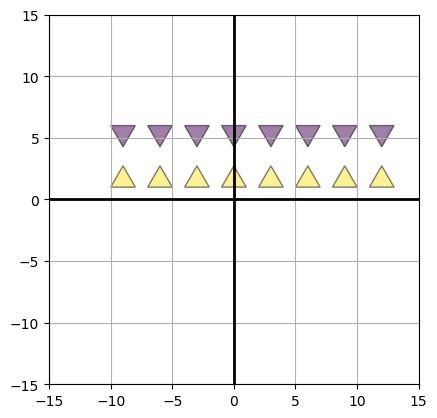

In [10]:
generator = PolygonGenerator(start_y = 1, start_x = -10)
triangle1 = generator.gen_triangle(size = 2)
triangle2 = generator.gen_triangle(size = 2)

symmetry_figure = generator.tr_symmetry(triangle1, OX=True, offset = 7)

plot_polygons([symmetry_figure, triangle2], n=8)

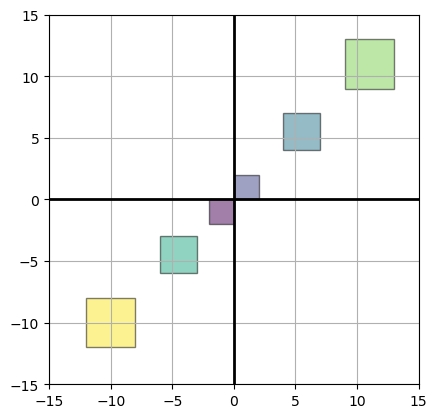

In [11]:
generator = PolygonGenerator()
rectangle1 = generator.gen_rectangle()
rectangle2 = generator.gen_rectangle()

scaled_rectangles1 = generator.tr_homothety(rectangle1, center_x=2, center_y=2, scale=2)
scaled_rectangles2 = generator.tr_homothety(rectangle2, center_x=0, center_y=0, scale=2)

rectangle3 = generator.gen_rectangle()
rectangle4 = generator.gen_rectangle()

scaled_rectangles3 = generator.tr_homothety(rectangle3, center_x=-2, center_y=-2, scale=3)
scaled_rectangles4 = generator.tr_homothety(rectangle4, center_x=3, center_y=3, scale=3)

rectangle5 = generator.gen_rectangle()
rectangle6 = generator.gen_rectangle()

scaled_rectangles5 = generator.tr_homothety(rectangle5, center_x=-3, center_y=-3, scale=4)
scaled_rectangles6 = generator.tr_homothety(rectangle6, center_x=4, center_y=4, scale=4)

plot_polygons([scaled_rectangles1, scaled_rectangles2, scaled_rectangles3, scaled_rectangles4, scaled_rectangles5, scaled_rectangles6], n=1)

выберите число от 1 до 3:
1-прямоугольники
2-треугольники
3-шестиугольники
1
выберите вариант отображения полигона:
1-параллельный перенос
2-поворот вокруг точки                      
3-симметрия OX
4-симметрия OY
5-стандартное отображение
6-гомотетия
4
введите отступ от оси Y: 3


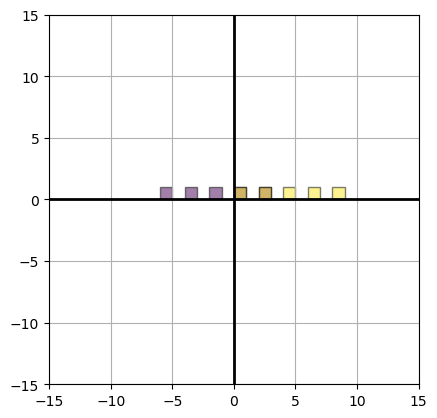

In [12]:
generator = PolygonGenerator(step=1)  # создаем экземпляр генератора с шагом 2 для разделения фигур

# создание итераторов для разных типов фигур
rectangles = generator.gen_rectangle(width=1, height=1)
triangles = generator.gen_triangle(size=1)
hexagons = generator.gen_hexagon(size=1)

# использование itertools.chain для создания смешанного итератора фигур
mixed_polygons = [generator.gen_rectangle(), generator.gen_triangle(), generator.gen_hexagon()]
all_polygons = [rectangles, triangles, hexagons]
# визуализация первых 10 фигур из смешанного итератора
while True:
    choose_figure = int(input('выберите число от 1 до 3:\n1-прямоугольники\n2-треугольники\n3-шестиугольники\n'))
    if choose_figure in [1,2,3]:
        figure_to_change = mixed_polygons[choose_figure-1]
        figure = all_polygons[choose_figure-1]
        param = input('выберите вариант отображения полигона:\n1-параллельный перенос\n2-поворот вокруг точки\
                      \n3-симметрия OX\n4-симметрия OY\n5-стандартное отображение\n6-гомотетия\n')
        if param == '5':
            plot_polygons([figure_to_change], n=10)
        if param == '1':
            a,b = map(int, input('задайте координаты начальной точки через пробел: ').split())
            translated_figure = generator.tr_translate(figure_to_change, a, b)
            plot_polygons([translated_figure, figure])
        if param == '2':
            x, y, angle = map(int, input('задайте координаты начальной точки и угол поворота через пробел: ').split())
            rotate_figure = generator.tr_rotate(figure_to_change, angle=angle, center_x=x, center_y=y)
            plot_polygons([rotate_figure, figure])
        if param == '3':
            offset = int(input('введите отступ от оси Х: '))
            symmetry_figure = generator.tr_symmetry(figure_to_change, OX=True, offset = offset)
            plot_polygons([symmetry_figure, figure])
        if param == '4':
            offset = int(input('введите отступ от оси Y: '))
            symmetry_figure = generator.tr_symmetry(figure_to_change, OY=True, offset = offset)
            plot_polygons([symmetry_figure, figure])
        if param == '6':
            x, y, scale = map(int, input('задайте координаты начальной точки и коэфициент: ').split())
            scaled_rectangles = generator.tr_homothety(figure_to_change, center_x=x, center_y=y, scale=scale)
            plot_polygons([scaled_rectangles])

        break
    else:
        print('некоректное значение, попробуйте еще раз!')

In [13]:
# функция фильтрации по площади
def polygon_area(polygon):
    # вычисляет площадь полигона, заданного списком координат (x, y)
    n = len(polygon)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += polygon[i][0] * polygon[j][1]
        area -= polygon[j][0] * polygon[i][1]
    area = abs(area) / 2.0
    return area

def flt_square(polygons, max_area):
    filtered_polygons = [polygon for polygon in polygons if polygon_area(polygon) < max_area]
    
    return filtered_polygons

polygons = [
    [(0, 0), (1, 0), (1, 1), (0, 1)],  # квадрат площадью 1
    [(0, 0), (2, 0), (2, 2), (0, 2)],  # квадрат площадью 4
    [(0, 0), (1, 0), (0.5, 0.866)]     # равносторонний треугольник площадью 0.433
]

# фильтрация полигонов с максимальной площадью 2
filtered_polygons = flt_square(polygons, max_area=2)

# вывод результатов
for poly in filtered_polygons:
    print(f"polygon: {poly} has area: {polygon_area(poly)}")

polygon: [(0, 0), (1, 0), (1, 1), (0, 1)] has area: 1.0
polygon: [(0, 0), (1, 0), (0.5, 0.866)] has area: 0.433
